In [24]:
# Import the required variables
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt, style # for ploting
import seaborn as sns

In [2]:
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

In [13]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

In [25]:
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

<Figure size 432x288 with 0 Axes>

In [26]:
# Import the required variables
import pandas as pd
import numpy as np

# Read the data
Res_Nonhydro_Capita = pd.read_excel ("../data/processed/Res_Nonhydro_Capita.xlsx", index_col = 0)
SDGs_Ranks_2021 = pd.read_excel ("../data/processed/SDGs_Ranks_2021.xlsx", index_col = 0)
SDGs_Scores_2021 = pd.read_excel ("../data/processed/SDGs_Scores_2021.xlsx", index_col = 0)

# Only consider the 2021 year
Res_Nonhydro_Capita_2021 = Res_Nonhydro_Capita[[2021]]
Res_Nonhydro_Capita_2021= Res_Nonhydro_Capita_2021.rename(columns={ 2021: 'Res_Nonhydro_Capita_2021'})

# Do not consider the first column
SDGs_Ranks_2021 = SDGs_Ranks_2021.iloc[:,1:]
SDGs_Scores_2021 = SDGs_Scores_2021.iloc[:,1:]

# Append the target to the Datasets
SDGs_Ranks_2021 = pd.concat([SDGs_Ranks_2021, Res_Nonhydro_Capita_2021], axis=1)
SDGs_Scores_2021 = pd.concat([SDGs_Scores_2021, Res_Nonhydro_Capita_2021], axis=1)

# Predicciones - Modelo Ensembles SDGs_Scores_2021

In [27]:
from sklearn.model_selection import train_test_split

X = SDGs_Scores_2021.drop('Res_Nonhydro_Capita_2021',1)
y = SDGs_Scores_2021['Res_Nonhydro_Capita_2021']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## A.- RandomForestRegressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

list_n_estimators = [10, 25, 50, 100, 200, 300, 500, 800, 1000]
list_max_leaf_nodes = [5, 10, 15, 20, 25]

n = 0
for n_estimatorsi in list_n_estimators:
    for max_leaf_nodesi in list_max_leaf_nodes:
        rnd_reg = RandomForestRegressor(n_estimators=n_estimatorsi, max_leaf_nodes=max_leaf_nodesi, random_state=42)
        rnd_reg.fit(X_train, y_train)
        predictions = rnd_reg.predict(X_test)
        if (n == 0): # The first time initialize
            MAE_Best = mean_absolute_error(y_test, predictions)
            n_estimators_Best = n_estimatorsi
            max_leaf_nodes_Best = max_leaf_nodesi
        else:
            MAE_New = mean_absolute_error(y_test, predictions)
            if (MAE_New < MAE_Best):
                MAE_Best = MAE_New
                n_estimators_Best = n_estimatorsi
                max_leaf_nodes_Best = max_leaf_nodesi
            else:
                pass
    n +=1
print('MAE_Best', MAE_Best, 
        'n_estimators', n_estimators_Best, 
        'max_leaf_nodes', max_leaf_nodes_Best)

MAE_Best 282.64984164724916 n_estimators 25 max_leaf_nodes 20


Coeficiente determinación Train: 0.7614042770640623
MAE Train: 230.24477577389885
MAPE Train: 5868268436519716.0
MSE Train: 711679.9595582478
RMSE Train: 843.6112609242765
--------------------
Coeficiente determinación Test: 0.46020601854981935
MAE Test: 282.64984164724916
MAPE Test: 1.624867244782338e+16
MSE Test: 383143.5468183866
RMSE Test: 618.9859019544682
Feature Importance


,importances
features,
SDG16,0.276171
SDG7,0.230262
SDG3,0.152737
SDG9,0.087229
SDG12,0.072661
SDG17,0.056477
SDG6,0.044201
SDG8,0.019483
SDG11,0.014557


--------------------
Permutation importance


,importances
features,
SDG16,0.339075
SDG7,0.186046
SDG3,0.034719
SDG9,0.031723
SDG12,0.028054
SDG6,0.012778
SDG17,0.010615
SDG5,0.005469
SDG11,0.004924


<AxesSubplot:title={'center':'Permutation Importance'}, ylabel='features'>

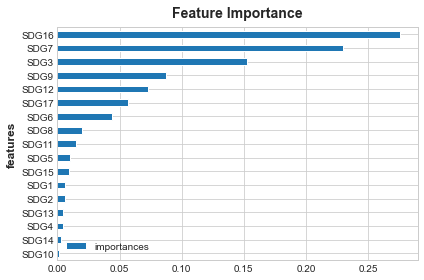

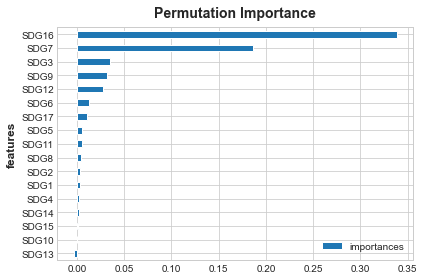

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

rnd_reg = RandomForestRegressor(n_estimators=25, max_leaf_nodes=20, random_state=42)
rnd_reg.fit(X_train, y_train)

y_pred = rnd_reg.predict(X_test)


print("Coeficiente determinación Train:", r2_score(y_train, rnd_reg.predict(X_train)))
print("MAE Train:", mean_absolute_error(y_train, rnd_reg.predict(X_train)))
print("MAPE Train:", mean_absolute_percentage_error(y_train, rnd_reg.predict(X_train)))
print("MSE Train:", mean_squared_error(y_train, rnd_reg.predict(X_train)))
print("RMSE Train:", np.sqrt(mean_squared_error(y_train, rnd_reg.predict(X_train))))

print('-'*20)

print("Coeficiente determinación Test:", r2_score(y_test, y_pred))
print("MAE Test:", mean_absolute_error(y_test, y_pred))
print("MAPE Test:", mean_absolute_percentage_error(y_test, y_pred))
print("MSE Test:", mean_squared_error(y_test, y_pred))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, y_pred)))

print('Feature Importance')
importances = pd.DataFrame({'features':X_train.columns, 'importances':rnd_reg.feature_importances_}).sort_values('importances', ascending=False)
#Visualizamos
importances.set_index('features', inplace = True)
display(importances)
importances.sort_values("importances").plot.barh(y='importances', title = 'Feature Importance')


print('-'*20)

print('Permutation importance')
from sklearn.inspection import permutation_importance

permutation_train = permutation_importance(estimator=rnd_reg,
                                    X = X_train,
                                    y = y_train,
                                    n_repeats = 10, #n_repeats = Number of times to permute a feature.
                                    random_state=42,
                                    scoring="r2")
permutation_importances = pd.DataFrame({'features':X_train.columns, 'importances': permutation_train.importances_mean}).sort_values('importances', ascending=False)

#Visualizamos
permutation_importances.set_index('features', inplace = True)
display(permutation_importances)
permutation_importances.sort_values("importances").plot.barh(y='importances', title = 'Permutation Importance')


--------------------
SHAP (SHapley Additive exPlanations) Importance


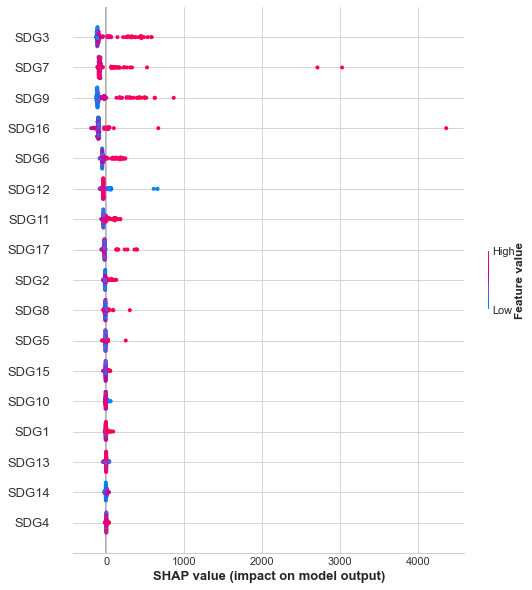

In [61]:
print('-'*20)

print('SHAP (SHapley Additive exPlanations) Importance')
import shap

explainer = shap.TreeExplainer(rnd_reg)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

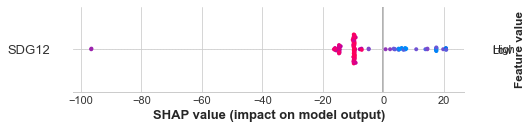

In [72]:
shap.summary_plot(shap_values[:,11:12], X_train.iloc[:, 11:12]) # SDG12

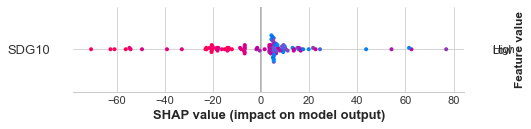

In [73]:
shap.summary_plot(shap_values[:,9:10], X_train.iloc[:, 9:10]) # SDG10

SHAP measures the impact of variables taking into account the interaction with other variables.

How to interpret the shap summary plot?
* The y-axis indicates the variable name, in order of importance from top to bottom. The value next to them is the mean SHAP value.
* On the x-axis is the SHAP value. Indicates how much is the change in log-odds. From this number we can extract the probability of success.
* Gradient color indicates the original value for that variable. In booleans, it will take two colors, but in number it can contain the whole spectrum.
* Each point represents a row from the original dataset.
Going back to the bike dataset, most of the variables are boolean.

We can see:
1. With lower values of SDG12 and SDG10, Res_Nonhydro_Capita_2021 is higher.
2. With higher values of the others, Res_Nonhydro_Capita_2021 is higher. 




## B.- AdaBoostRegressor

In [32]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

list_n_estimators = [10, 25, 50, 100, 200, 300, 500, 800, 1000]

n = 0
for n_estimatorsi in list_n_estimators:
    ada_reg = AdaBoostRegressor(n_estimators=n_estimatorsi, random_state=42)
    ada_reg.fit(X_train, y_train)
    predictions = ada_reg.predict(X_test)
    if (n == 0): # The first time initialize
        MAE_Best = mean_absolute_error(y_test, predictions)
        n_estimators_Best = n_estimatorsi
    else:
        MAE_New = mean_absolute_error(y_test, predictions)
        if (MAE_New < MAE_Best):
            MAE_Best = MAE_New
            n_estimators_Best = n_estimatorsi
        else:
            pass
    n +=1
print('MAE_Best', MAE_Best, 
        'n_estimators', n_estimators_Best)

MAE_Best 638.0563302218949 n_estimators 10


Coeficiente determinación Train: 0.9744582111042487
MAE Train: 185.3746520562977
MAPE Train: 1.0719655336913634e+16
MSE Train: 76185.68792724852
RMSE Train: 276.01755003486375
--------------------
Coeficiente determinación Test: -7.334713711442065
MAE Test: 638.0563302218949
MAPE Test: 5.417048572756107e+16
MSE Test: 5915945.49561031
RMSE Test: 2432.271673890544
Feature Importance


,importances
features,
SDG16,0.524701
SDG7,0.147596
SDG12,0.127371
SDG11,0.096791
SDG17,0.050778
SDG9,0.017181
SDG6,0.013228
SDG8,0.011638
SDG15,0.003985


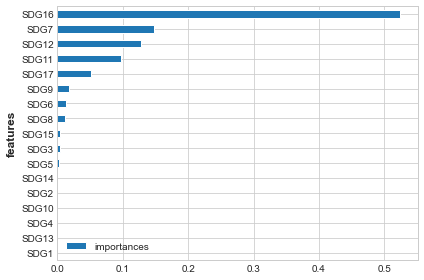

In [33]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

ada_reg = AdaBoostRegressor(n_estimators=10, random_state=42)
ada_reg.fit(X_train, y_train)

y_pred = ada_reg.predict(X_test)


print("Coeficiente determinación Train:", r2_score(y_train, ada_reg.predict(X_train)))
print("MAE Train:", mean_absolute_error(y_train, ada_reg.predict(X_train)))
print("MAPE Train:", mean_absolute_percentage_error(y_train, ada_reg.predict(X_train)))
print("MSE Train:", mean_squared_error(y_train, ada_reg.predict(X_train)))
print("RMSE Train:", np.sqrt(mean_squared_error(y_train, ada_reg.predict(X_train))))

print('-'*20)

print("Coeficiente determinación Test:", r2_score(y_test, y_pred))
print("MAE Test:", mean_absolute_error(y_test, y_pred))
print("MAPE Test:", mean_absolute_percentage_error(y_test, y_pred))
print("MSE Test:", mean_squared_error(y_test, y_pred))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, y_pred)))

print('Feature Importance')
importances = pd.DataFrame({'features':X_train.columns, 'importances':ada_reg.feature_importances_}).sort_values('importances', ascending=False)
#Visualizamos
importances.set_index('features', inplace = True)
display(importances)
importances.sort_values("importances").plot.barh(y='importances');

No bueno

## C.- GradientBoostingRegressor

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

list_n_estimators = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
list_max_depth = [5, 10, 15, 20, 25]
list_learning_rate = [0.01, 0.1, 0.5, 0.75, 1, 1.25, 1.5]
n = 0
for n_estimatorsi in list_n_estimators:
    for max_depthi in list_max_depth:
        for learning_ratei in list_learning_rate:
            gbrt = GradientBoostingRegressor(n_estimators=n_estimatorsi, max_depth=max_depthi, learning_rate=learning_ratei, random_state=42)
            gbrt.fit(X_train, y_train)
            predictions = gbrt.predict(X_test)
            if (n == 0): # The first time initialize
                MAE_Best = mean_absolute_error(y_test, predictions)
                n_estimators_Best = n_estimatorsi
                max_depth_Best = max_depthi
                learning_rate_Best = learning_ratei
            else:
                MAE_New = mean_absolute_error(y_test, predictions)
                if (MAE_New < MAE_Best):
                    MAE_Best = MAE_New
                    n_estimators_Best = n_estimatorsi
                    max_depth_Best = max_depthi
                    learning_rate_Best = learning_ratei
                else:
                    pass
    n +=1
print('MAE_Best', MAE_Best, 
        'n_estimators', n_estimators_Best, 
        'max_depth', max_depth_Best,
        'learning_rate', learning_rate_Best)

MAE_Best 444.85525398875546 n_estimators 2 max_depth 10 learning_rate 0.1


Coeficiente determinación Train: 0.3438955695400825
MAE Train: 642.9841184023484
MAPE Train: 4.28922890185039e+16
MSE Train: 1957019.047910899
RMSE Train: 1398.934969150067
--------------------
Coeficiente determinación Test: 0.5941939844281761
MAE Test: 444.85525398875546
MAPE Test: 2.512043702675522e+17
MSE Test: 288039.4399891544
RMSE Test: 536.6930593823199
Feature Importance


,importances
features,
SDG16,0.789295
SDG9,0.131576
SDG17,0.028646
SDG3,0.013034
SDG4,0.010114
SDG14,0.006576
SDG15,0.006390
SDG10,0.004669
SDG6,0.003797


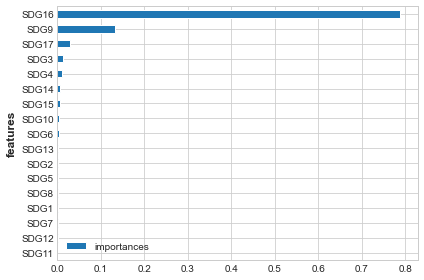

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

gbrt = GradientBoostingRegressor(n_estimators=2, max_depth=10, learning_rate=0.1, random_state=42)
gbrt.fit(X_train, y_train)

y_pred = gbrt.predict(X_test)


print("Coeficiente determinación Train:", r2_score(y_train, gbrt.predict(X_train)))
print("MAE Train:", mean_absolute_error(y_train, gbrt.predict(X_train)))
print("MAPE Train:", mean_absolute_percentage_error(y_train, gbrt.predict(X_train)))
print("MSE Train:", mean_squared_error(y_train, gbrt.predict(X_train)))
print("RMSE Train:", np.sqrt(mean_squared_error(y_train, gbrt.predict(X_train))))

print('-'*20)

print("Coeficiente determinación Test:", r2_score(y_test, y_pred))
print("MAE Test:", mean_absolute_error(y_test, y_pred))
print("MAPE Test:", mean_absolute_percentage_error(y_test, y_pred))
print("MSE Test:", mean_squared_error(y_test, y_pred))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, y_pred)))

print('Feature Importance')
importances = pd.DataFrame({'features':X_train.columns, 'importances':gbrt.feature_importances_}).sort_values('importances', ascending=False)
#Visualizamos
importances.set_index('features', inplace = True)
display(importances)
importances.sort_values("importances").plot.barh(y='importances');

No bueno

## D.- XGBRegressor

In [22]:
import xgboost
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

list_n_estimators = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
list_max_depth = [5, 10, 15, 20, 25]
list_learning_rate = [0.01, 0.1, 0.5, 0.75, 1, 1.25, 1.5]
n = 0
for n_estimatorsi in list_n_estimators:
    for max_depthi in list_max_depth:
        for learning_ratei in list_learning_rate:
            xgb_reg = xgboost.XGBRegressor(n_estimators=n_estimatorsi, max_depth=max_depthi, learning_rate=learning_ratei, random_state=42)
            xgb_reg.fit(X_train, y_train)
            predictions = xgb_reg.predict(X_test)
            if (n == 0): # The first time initialize
                MAE_Best = mean_absolute_error(y_test, predictions)
                n_estimators_Best = n_estimatorsi
                max_depth_Best = max_depthi
                learning_rate_Best = learning_ratei
            else:
                MAE_New = mean_absolute_error(y_test, predictions)
                if (MAE_New < MAE_Best):
                    MAE_Best = MAE_New
                    n_estimators_Best = n_estimatorsi
                    max_depth_Best = max_depthi
                    learning_rate_Best = learning_ratei
                else:
                    pass
    n +=1
print('MAE_Best', MAE_Best, 
        'n_estimators', n_estimators_Best, 
        'max_depth', max_depth_Best,
        'learning_rate', learning_rate_Best)

MAE_Best 263.61177574170426 n_estimators 5 max_depth 10 learning_rate 0.1


Coeficiente determinación Train: 0.3638414906122822
MAE Train: 434.72753282645925
MAPE Train: 56803311617203.09
MSE Train: 1897524.635658478
RMSE Train: 1377.5066735440805
--------------------
Coeficiente determinación Test: 0.6927099517512012
MAE Test: 263.61177574170426
MAPE Test: 1490925793125525.8
MSE Test: 218113.21176967243
RMSE Test: 467.0259219461725
--------------------
Feature Importance


,importances
features,
SDG16,0.832602
SDG9,0.129166
SDG17,0.010772
SDG3,0.007952
SDG15,0.005450
SDG10,0.004191
SDG6,0.003536
SDG4,0.001092
SDG2,0.000917


--------------------
Permutation importance


,importances
features,
SDG16,0.354235
SDG9,0.086964
SDG6,0.020947
SDG17,0.016379
SDG12,0.014597
SDG3,0.009109
SDG15,0.005366
SDG1,0.003971
SDG10,0.003609


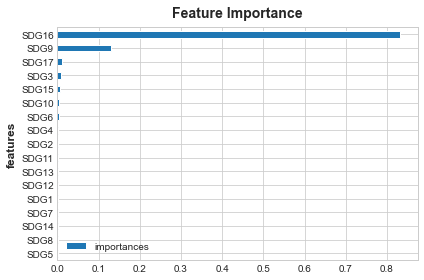

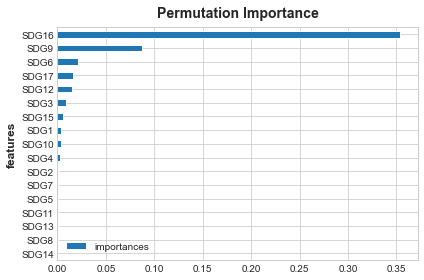

In [63]:
import xgboost
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

xgb_reg = xgboost.XGBRegressor(n_estimators=5, max_depth=10, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)


print("Coeficiente determinación Train:", r2_score(y_train, xgb_reg.predict(X_train)))
print("MAE Train:", mean_absolute_error(y_train, xgb_reg.predict(X_train)))
print("MAPE Train:", mean_absolute_percentage_error(y_train, xgb_reg.predict(X_train)))
print("MSE Train:", mean_squared_error(y_train, xgb_reg.predict(X_train)))
print("RMSE Train:", np.sqrt(mean_squared_error(y_train, xgb_reg.predict(X_train))))

print('-'*20)

print("Coeficiente determinación Test:", r2_score(y_test, y_pred))
print("MAE Test:", mean_absolute_error(y_test, y_pred))
print("MAPE Test:", mean_absolute_percentage_error(y_test, y_pred))
print("MSE Test:", mean_squared_error(y_test, y_pred))
print("RMSE Test:", np.sqrt(mean_squared_error(y_test, y_pred)))

print('-'*20)

print('Feature Importance')
importances = pd.DataFrame({'features':X_train.columns, 'importances':xgb_reg.feature_importances_}).sort_values('importances', ascending=False)
#Visualizamos
importances.set_index('features', inplace = True)
display(importances)
importances.sort_values("importances").plot.barh(y='importances', title = 'Feature Importance')

print('-'*20)

print('Permutation importance')
from sklearn.inspection import permutation_importance

permutation_train = permutation_importance(estimator=xgb_reg,
                                    X = X_train,
                                    y = y_train,
                                    n_repeats = 10, #n_repeats = Number of times to permute a feature.
                                    random_state=42,
                                    scoring="r2")
permutation_importances = pd.DataFrame({'features':X_train.columns, 'importances': permutation_train.importances_mean}).sort_values('importances', ascending=False)

#Visualizamos
permutation_importances.set_index('features', inplace = True)
display(permutation_importances)
permutation_importances.sort_values("importances").plot.barh(y='importances', title = 'Permutation Importance');



--------------------
SHAP (SHapley Additive exPlanations) Importance


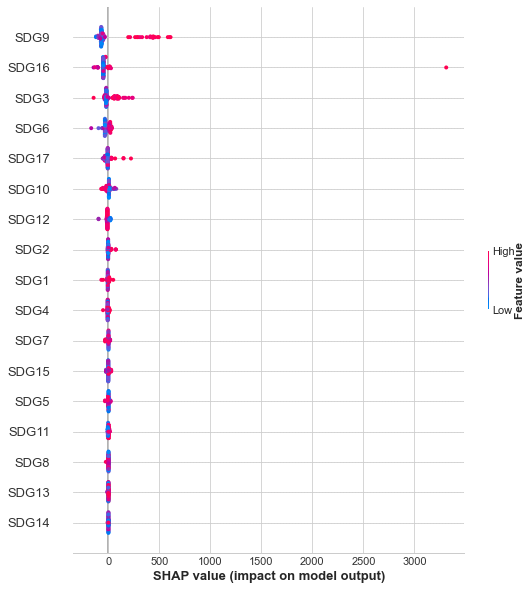

In [64]:
print('-'*20)

print('SHAP (SHapley Additive exPlanations) Importance')
import shap

explainer = shap.TreeExplainer(xgb_reg)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

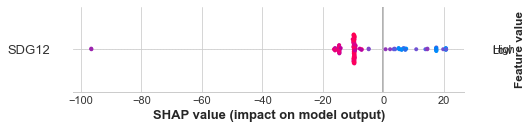

In [71]:
shap.summary_plot(shap_values[:,11:12], X_train.iloc[:, 11:12])

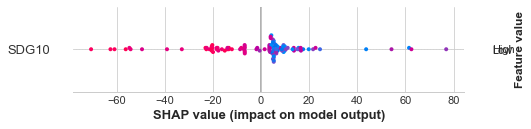

In [70]:
shap.summary_plot(shap_values[:,9:10], X_train.iloc[:, 9:10])

SHAP measures the impact of variables taking into account the interaction with other variables.

How to interpret the shap summary plot?
* The y-axis indicates the variable name, in order of importance from top to bottom. The value next to them is the mean SHAP value.
* On the x-axis is the SHAP value. Indicates how much is the change in log-odds. From this number we can extract the probability of success.
* Gradient color indicates the original value for that variable. In booleans, it will take two colors, but in number it can contain the whole spectrum.
* Each point represents a row from the original dataset.
Going back to the bike dataset, most of the variables are boolean.

We can see:
1. With lower values of SDG12 and SDG10, Res_Nonhydro_Capita_2021 is higher.
2. With higher values of the others, Res_Nonhydro_Capita_2021 is higher. 

# CONCLUSIÓN


#### Los mejores son:

**XGBRegressor**
* xgb_reg = xgboost.XGBRegressor(n_estimators=5, max_depth=10, learning_rate=0.1, random_state=42)
* MAE Test: 263.61177574170426

**RandomForestRegressor**
* rnd_reg = RandomForestRegressor(n_estimators=25, max_leaf_nodes=20, random_state=42)
* MAE Test: 282.64984164724916

